# Notebook 5 - County Level Analysis
In this notebook, we examine the relationship between GDP and Education Level,(using percentage of adults with a bachelor's degree as an indicator). We compile county data, for some of the US states with the highest population. Using scatterplots, we check for a relationship between these two variables. 


We start by using the data on GDP per county, and Education Level to create several dataframes. The final dataframe contains the percentage of adults with a bachelor's degree or higher, and the GDP for every county wihin a state. We start with North Carolina, one of the most populated US states, and repeat the process for several of the other most populated states. 


Table 1


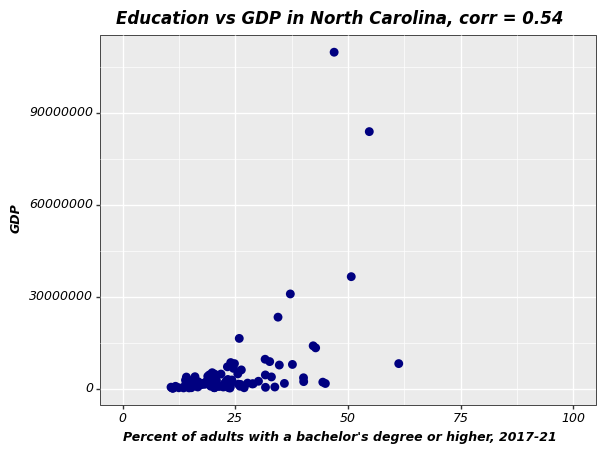

<ggplot: (103854338055)>

In [16]:

import pandas as pd
from plotnine import *

df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Grouping the data by state
state_groups = df.groupby('StateName')

# New dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict  

dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]

new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})

NC_dataframe = new_df[new_df['State'] == 'NC']
NC_County_GDP = state_dict['North Carolina']

ncarolina_dataframe = pd.DataFrame.from_dict(NC_County_GDP, orient='index' )
ncarolina_dataframe = ncarolina_dataframe.rename(columns={ncarolina_dataframe.columns[0]: "GDP"})
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in NC_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
ncarolina_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list

correlation_coefficient = ncarolina_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].corr(ncarolina_dataframe["GDP"])
correlation_text = f"Correlation: {correlation_coefficient:.2f}"

northcarolina = ggplot(ncarolina_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + \
          geom_point(size = 2, color = 'navy', stroke = 0.8) +  ggtitle(f"Education vs GDP in North Carolina, corr = {correlation_coefficient:.2f}") + \
          theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None))
northcarolina

The correlation coefficient is calculated, for every state, and displayed above the scatterplots. North Carolina's positive correlation coefficient (0.54) indicates that the two variables, GDP and Education level, have a postitive linear relationship. Upon comparing this value of 0.54 for North Carolina to that of other states, we can conduct further analysis. 

Table 1


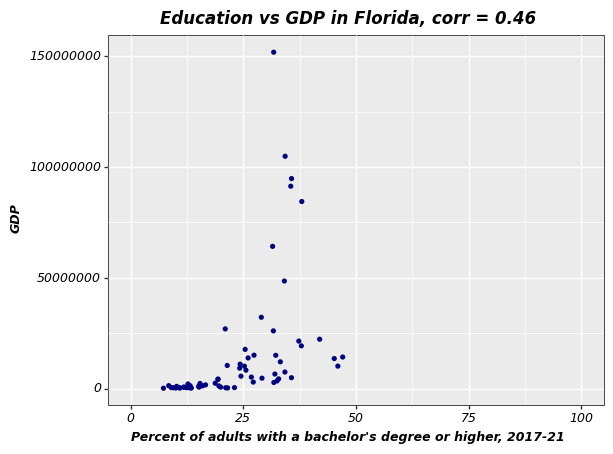

<ggplot: (103854311409)>

In [7]:
from plotnine import *
import pandas as pd
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict
dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]

new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})

FL_dataframe = new_df[new_df['State'] == 'FL']
FL_County_GDP = state_dict['Florida']

florida_dataframe = pd.DataFrame.from_dict(FL_County_GDP, orient='index' )
florida_dataframe = florida_dataframe.rename(columns={florida_dataframe.columns[0]: "GDP"})

percent_list = []
for x in FL_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)
    
florida_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
florida_dataframe
from plotnine import *


correlation_coefficient = florida_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].corr(florida_dataframe["GDP"])
correlation_text = f"Correlation: {correlation_coefficient:.2f}"
florida = ggplot(florida_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.5, color = 'navy', stroke = 0.8) + ggtitle(f"Education vs GDP in Florida, corr = {correlation_coefficient:.2f}")+ theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None))
florida 

Florida Correlation Coefficient: 0.46

Table 1


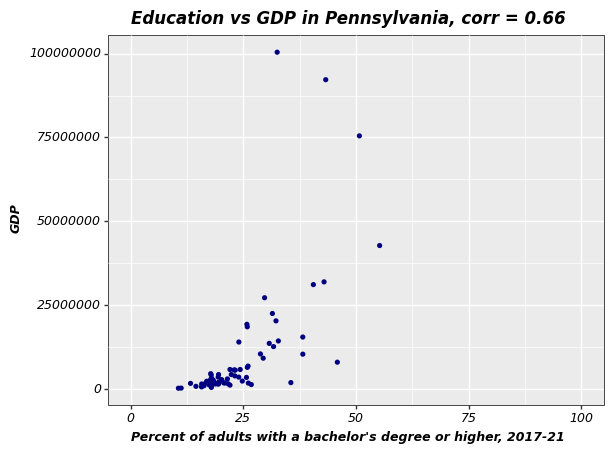

<ggplot: (103854311322)>

In [8]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict
dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



PA_dataframe = new_df[new_df['State'] == 'PA']
PA_County_GDP = state_dict['Pennsylvania']


penn_dataframe = pd.DataFrame.from_dict(PA_County_GDP, orient='index' )

penn_dataframe = penn_dataframe.rename(columns={penn_dataframe.columns[0]: "GDP"})

# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in PA_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
penn_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
penn_dataframe

from plotnine import *
correlation_coefficient = penn_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].corr(penn_dataframe["GDP"])
correlation_text = f"Correlation: {correlation_coefficient:.2f}"
pennsylvania = ggplot(penn_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.5, color = 'navy', stroke = 0.8) + ggtitle(f"Education vs GDP in Pennsylvania, corr = {correlation_coefficient:.2f}") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None))
pennsylvania

Pennsylvania Correlation Coefficient: 0.66

Table 1


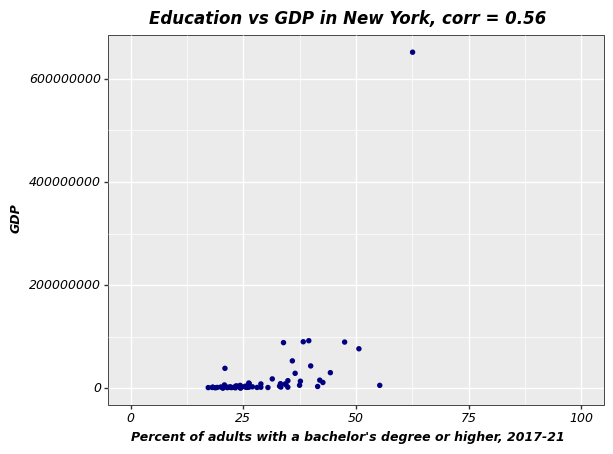

<ggplot: (103854505400)>

In [10]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



NY_dataframe = new_df[new_df['State'] == 'NY']
NY_County_GDP = state_dict['New York']


ny_dataframe = pd.DataFrame.from_dict(NY_County_GDP, orient='index' )

ny_dataframe = ny_dataframe.rename(columns={ny_dataframe.columns[0]: "GDP"})




# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in NY_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
ny_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
ny_dataframe



from plotnine import *


correlation_coefficient = ny_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].corr(ny_dataframe["GDP"])
correlation_text = f"Correlation: {correlation_coefficient:.2f}"
newyork = ggplot(ny_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.6, color = 'navy', stroke = 0.8) + ggtitle(f"Education vs GDP in New York, corr = {correlation_coefficient:.2f}") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None))
newyork

New York Correlation Coefficient = 0.56

Table 1


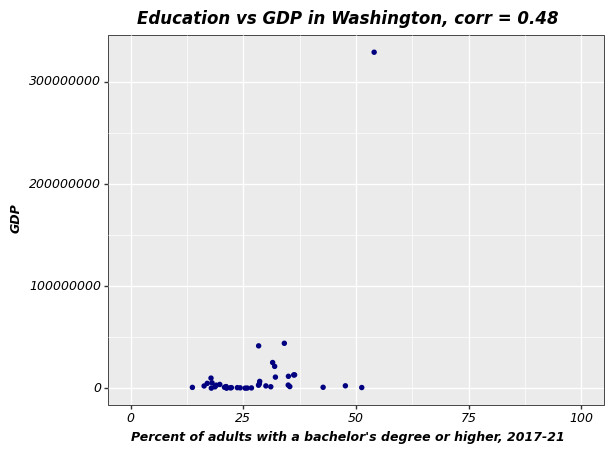

<ggplot: (103857249217)>

In [13]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



WA_dataframe = new_df[new_df['State'] == 'WA']
WA_County_GDP = state_dict['Washington']


wa_dataframe = pd.DataFrame.from_dict(WA_County_GDP, orient='index' )

wa_dataframe = wa_dataframe.rename(columns={wa_dataframe.columns[0]: "GDP"})




# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in WA_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
wa_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
wa_dataframe



from plotnine import *


correlation_coefficient = wa_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].corr(wa_dataframe["GDP"])
correlation_text = f"Correlation: {correlation_coefficient:.2f}"
washington = ggplot(wa_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.6, color = 'navy', stroke = 0.8) + ggtitle(f"Education vs GDP in Washington, corr = {correlation_coefficient:.2f}") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None))
washington 

Washington Correlation Coefficient = 0.48

The state here with the highest correlation coefficient and therefore the strongest linear relatonship between GDP and Education Level is Pennsylvania (0.66)

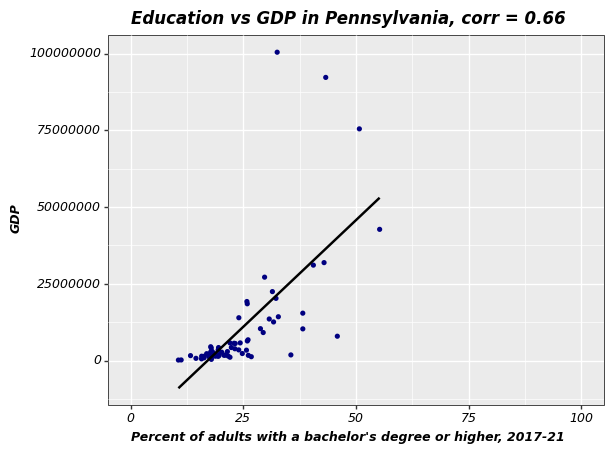

<ggplot: (103854471084)>

In [14]:
pennsylvania + geom_smooth(method='lm', se=False)

We plot the line of best fit to demonstrate visibly, that the theory that higher levels of income are linked to education levels, is supported here. This does not, however, imply causation. 